# Analysis of Mturk responses on experiment 2

In [30]:
# Imports
import numpy as np
import json
import os
import cv2
from matplotlib.patches import Circle
import matplotlib.pyplot as plt

In [2]:
# Load mturk responses

def load_1_json(path):
    with open(path, "r") as f:
        resp = json.load(f)
        
    return resp
        
resp_list = load_1_json("../df_1level.json")

In [16]:
def describe_mturk_response(resp_list):
    '''Describe a response list for future reference'''
    
    print("Number of response dicts:", len(resp_list))
    print("Each response object has key corresponding to MTurk variables:")
    print(resp_list[0].keys())
    print("The 'results' key contains the turker annotations. They come as a string that can be read as a dictionary with json.loads(resp[0]['results']).")
    d = json.loads(resp_list[0]["results"])
    print("\nThe extracted dictionary has the following keys:")
    print(d.keys())
    print("The 'output' key contains a dictionary with one response per video shown. Each dict key corresponds to a level-video.")
    print(d["outputs"].keys())
    print("\nd['outputs']['0-0'] contains the responses for video 0 in level 0. Corresponds to a dict with just one key, the video name:")
    print(d["outputs"]['0-0'].keys())
    print("And the value of that dict has an array of [x,y,t] annotations. In this case, there are",
          len([d["outputs"]['0-0'][k] for k in d["outputs"]['0-0'].keys()][0]), "annotations")
    
    print("The annotations are:")
    print([d["outputs"]['0-0'][k] for k in d["outputs"]['0-0'].keys()][0][:5], '...')
    
    
    frames_annotated = {}
    for r in resp_list:
        d =json.loads(r["results"])
        for k,v in d["outputs"].items():
            annot_list = list(v.values())[0]
            for l in annot_list:
                frames_annotated[l[-1]] = frames_annotated.get(l[-1], 0) 
                frames_annotated[l[-1]] +=1
            
#     print("\nAnnots per frame:",frames_annotated)

describe_mturk_response(resp_list)

Number of response dicts: 19
Each response object has key corresponding to MTurk variables:
dict_keys(['HITId', 'AssignmentId', 'WorkerId', 'AcceptTime', 'SubmitTime', 'TaskTime', 'workerId', 'taskTime', 'feedback', 'results'])
The 'results' key contains the turker annotations. They come as a string that can be read as a dictionary with json.loads(resp[0]['results']).

The extracted dictionary has the following keys:
dict_keys(['outputs'])
The 'output' key contains a dictionary with one response per video shown. Each dict key corresponds to a level-video.
dict_keys(['0-0', '0-1', '0-2', '0-3', '0-4', '0-5', '0-6', '0-7', '0-8', '0-9'])

d['outputs']['0-0'] contains the responses for video 0 in level 0. Corresponds to a dict with just one key, the video name:
dict_keys(['http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kmtqqzwtox.mp4/face_0.mp4'])
And the value of that dict has an array of [x,y,t] annotations. In this case, ther

Looking at vid 0-0
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kmtqqzwtox.mp4/face_0.mp4


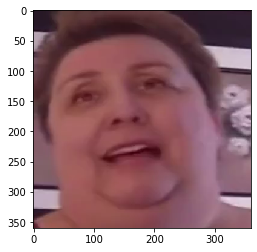

vid.shape (299, 360, 360, 3)
annot max and mins
540
350
441
125
Looking at vid 0-1
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dneghxhqsr.mp4/face_0.mp4


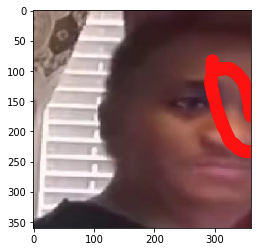

vid.shape (299, 360, 360, 3)
annot max and mins
521
539
8
3
Looking at vid 0-2
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kkfgefeqfr.mp4/face_0.mp4


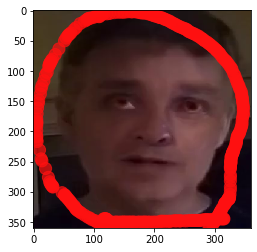

vid.shape (299, 360, 360, 3)
annot max and mins
497
522
76
20
Looking at vid 0-3
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/doiwcojvgj.mp4/face_0.mp4


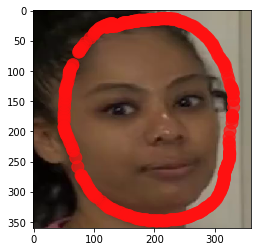

vid.shape (299, 360, 360, 3)
annot max and mins
380
491
47
85
Looking at vid 0-4
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dowybibeqv.mp4/face_0.mp4


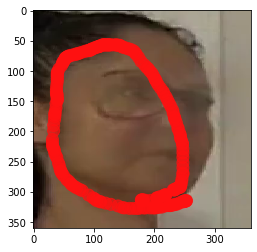

vid.shape (299, 360, 360, 3)
annot max and mins
500
509
55
46
Looking at vid 0-5
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/djdawhgbsk.mp4/face_0.mp4


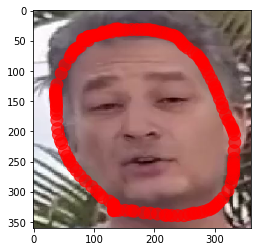

vid.shape (299, 360, 360, 3)
annot max and mins
154
530
0
309
Looking at vid 0-6
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dpihwwnser.mp4/face_0.mp4


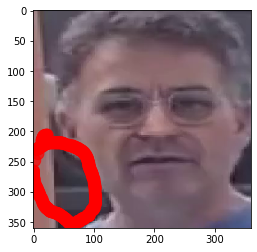

vid.shape (299, 360, 360, 3)
annot max and mins
168
450
39
336
Looking at vid 0-7
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dplgqdumdb.mp4/face_0.mp4


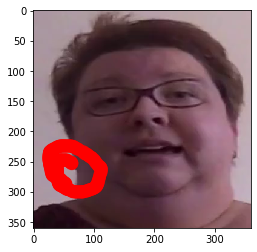

vid.shape (299, 360, 360, 3)
annot max and mins
479
257
360
142
Looking at vid 0-8
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kjgtiagnsq.mp4/face_0.mp4


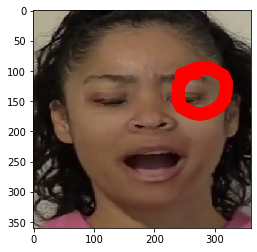

vid.shape (299, 360, 360, 3)
annot max and mins
477
274
327
132
Looking at vid 0-9
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dqmptbhnvo.mp4/face_0.mp4


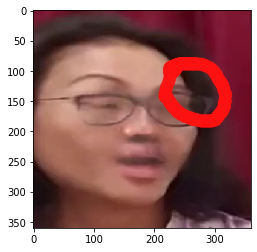

vid.shape (299, 360, 360, 3)
annot max and mins
451
321
262
170
Looking at vid 0-0
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kmtqqzwtox.mp4/face_0.mp4


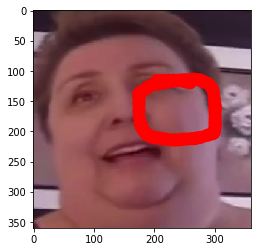

vid.shape (299, 360, 360, 3)
annot max and mins
205
245
205
245
Looking at vid 0-1
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dneghxhqsr.mp4/face_0.mp4


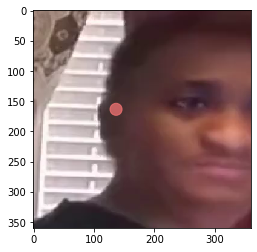

vid.shape (299, 360, 360, 3)
annot max and mins
454
375
441
375
Looking at vid 0-2
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kkfgefeqfr.mp4/face_0.mp4


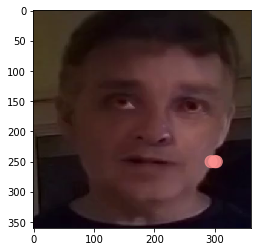

vid.shape (299, 360, 360, 3)
annot max and mins
288
296
287
296
Looking at vid 0-3
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/doiwcojvgj.mp4/face_0.mp4


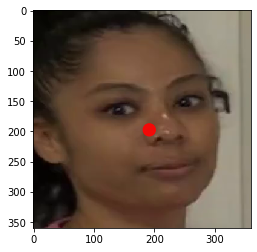

vid.shape (299, 360, 360, 3)
annot max and mins
317
335
317
335
Looking at vid 0-4
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dowybibeqv.mp4/face_0.mp4


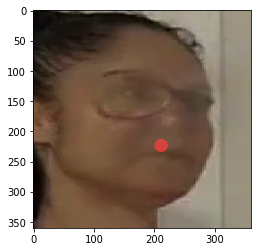

vid.shape (299, 360, 360, 3)
annot max and mins
348
276
348
276
Looking at vid 0-5
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/djdawhgbsk.mp4/face_0.mp4


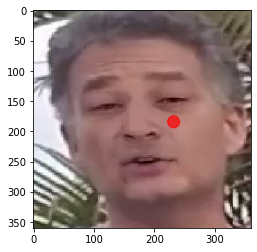

vid.shape (299, 360, 360, 3)
annot max and mins
205
363
203
362
Looking at vid 0-6
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dpihwwnser.mp4/face_0.mp4


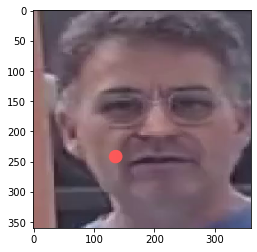

vid.shape (299, 360, 360, 3)
annot max and mins
350
329
350
329
Looking at vid 0-7
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dplgqdumdb.mp4/face_0.mp4


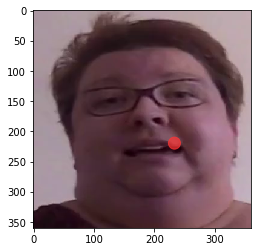

vid.shape (299, 360, 360, 3)
annot max and mins
405
332
284
243
Looking at vid 0-8
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kjgtiagnsq.mp4/face_0.mp4


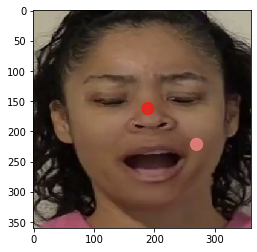

vid.shape (299, 360, 360, 3)
annot max and mins
434
206
434
206
Looking at vid 0-9
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dqmptbhnvo.mp4/face_0.mp4


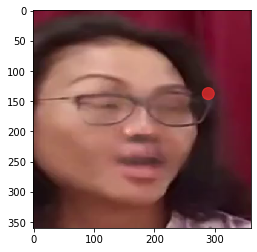

vid.shape (299, 360, 360, 3)
annot max and mins
335
297
335
297
Looking at vid 0-0
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kmtqqzwtox.mp4/face_0.mp4


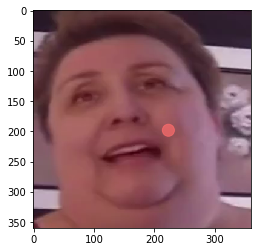

vid.shape (299, 360, 360, 3)
annot max and mins
39
273
27
273
Looking at vid 0-1
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dneghxhqsr.mp4/face_0.mp4


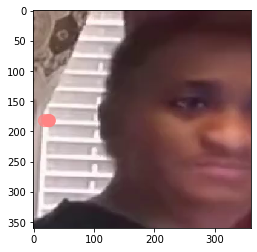

vid.shape (299, 360, 360, 3)
annot max and mins
332
294
220
255
Looking at vid 0-2
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kkfgefeqfr.mp4/face_0.mp4


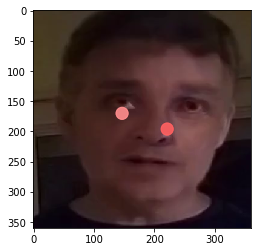

vid.shape (299, 360, 360, 3)
annot max and mins
377
373
140
182
Looking at vid 0-3
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/doiwcojvgj.mp4/face_0.mp4


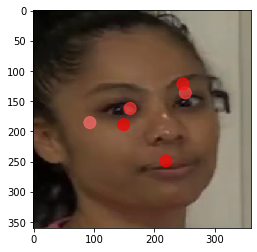

vid.shape (299, 360, 360, 3)
annot max and mins
424
393
92
228
Looking at vid 0-4
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dowybibeqv.mp4/face_0.mp4


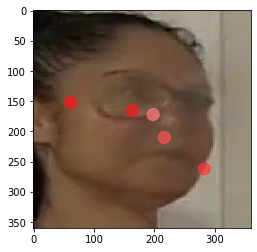

vid.shape (299, 360, 360, 3)
annot max and mins
469
403
216
172
Looking at vid 0-5
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/djdawhgbsk.mp4/face_0.mp4


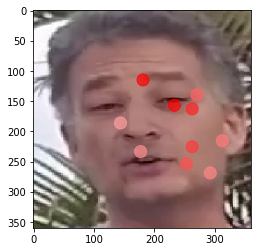

vid.shape (299, 360, 360, 3)
annot max and mins
334
379
334
379
Looking at vid 0-6
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dpihwwnser.mp4/face_0.mp4


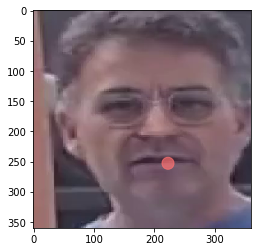

vid.shape (299, 360, 360, 3)
annot max and mins
300
139
300
139
Looking at vid 0-7
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dplgqdumdb.mp4/face_0.mp4


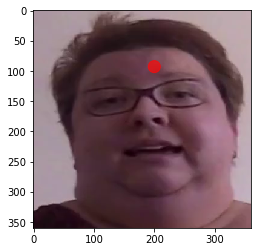

vid.shape (299, 360, 360, 3)
annot max and mins
417
503
110
194
Looking at vid 0-8
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kjgtiagnsq.mp4/face_0.mp4


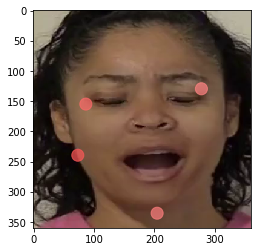

vid.shape (299, 360, 360, 3)
annot max and mins
391
344
134
187
Looking at vid 0-9
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dqmptbhnvo.mp4/face_0.mp4


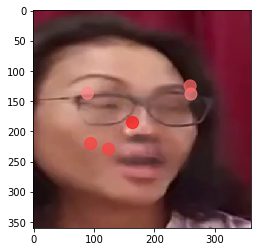

vid.shape (299, 360, 360, 3)
annot max and mins
447
363
166
239
Looking at vid 0-0
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kmtqqzwtox.mp4/face_0.mp4


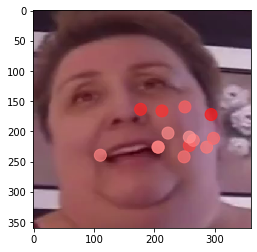

vid.shape (299, 360, 360, 3)
annot max and mins
367
222
157
201
Looking at vid 0-1
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dneghxhqsr.mp4/face_0.mp4


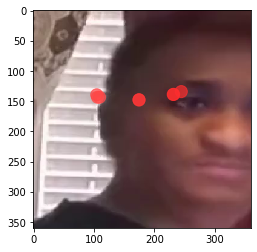

vid.shape (299, 360, 360, 3)
annot max and mins
266
379
146
109
Looking at vid 0-2
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kkfgefeqfr.mp4/face_0.mp4


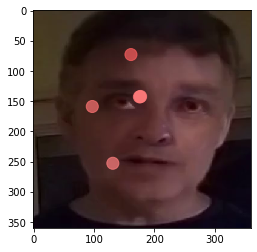

vid.shape (299, 360, 360, 3)
annot max and mins
425
431
207
182
Looking at vid 0-3
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/doiwcojvgj.mp4/face_0.mp4


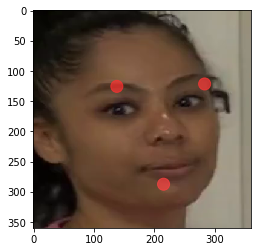

vid.shape (299, 360, 360, 3)
annot max and mins
413
392
211
169
Looking at vid 0-4
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dowybibeqv.mp4/face_0.mp4


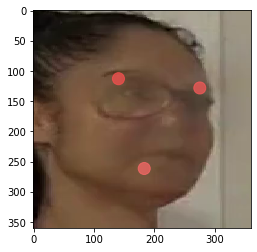

vid.shape (299, 360, 360, 3)
annot max and mins
432
368
254
215
Looking at vid 0-5
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/djdawhgbsk.mp4/face_0.mp4


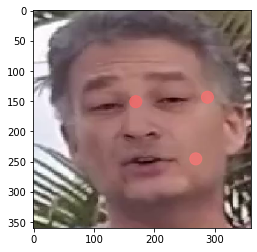

vid.shape (299, 360, 360, 3)
annot max and mins
388
386
151
195
Looking at vid 0-6
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dpihwwnser.mp4/face_0.mp4


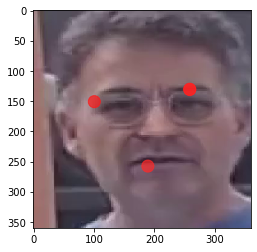

vid.shape (299, 360, 360, 3)
annot max and mins
419
391
203
186
Looking at vid 0-7
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dplgqdumdb.mp4/face_0.mp4


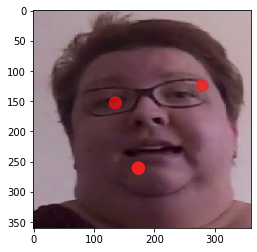

vid.shape (299, 360, 360, 3)
annot max and mins
464
444
83
203
Looking at vid 0-8
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kjgtiagnsq.mp4/face_0.mp4


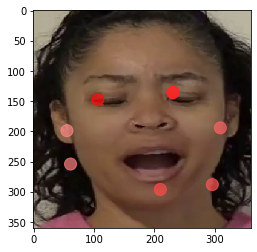

vid.shape (299, 360, 360, 3)
annot max and mins
436
445
126
174
Looking at vid 0-9
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dqmptbhnvo.mp4/face_0.mp4


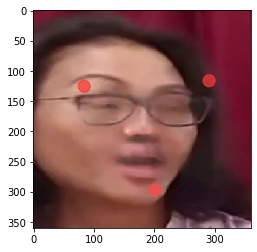

vid.shape (299, 360, 360, 3)
annot max and mins
500
417
194
198
Looking at vid 0-0
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kmtqqzwtox.mp4/face_0.mp4


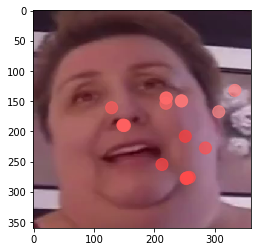

vid.shape (299, 360, 360, 3)
annot max and mins
361
393
359
393
Looking at vid 0-1
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dneghxhqsr.mp4/face_0.mp4


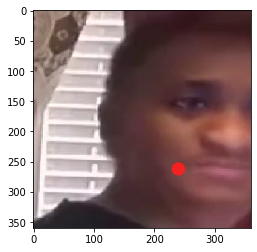

vid.shape (299, 360, 360, 3)
annot max and mins
398
437
111
164
Looking at vid 0-2
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kkfgefeqfr.mp4/face_0.mp4


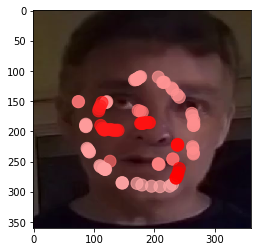

vid.shape (299, 360, 360, 3)
annot max and mins
448
437
162
143
Looking at vid 0-3
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/doiwcojvgj.mp4/face_0.mp4


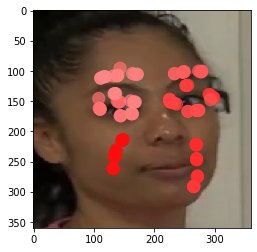

vid.shape (299, 360, 360, 3)
annot max and mins
374
432
109
172
Looking at vid 0-4
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dowybibeqv.mp4/face_0.mp4


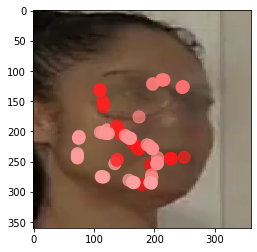

vid.shape (299, 360, 360, 3)
annot max and mins
446
524
134
176
Looking at vid 0-5
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/djdawhgbsk.mp4/face_0.mp4


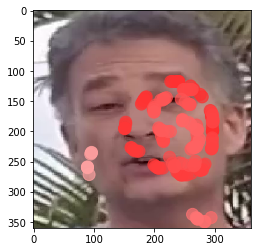

vid.shape (299, 360, 360, 3)
annot max and mins
484
440
67
153
Looking at vid 0-6
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dpihwwnser.mp4/face_0.mp4


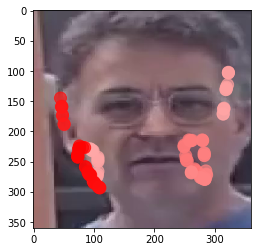

vid.shape (299, 360, 360, 3)
annot max and mins
529
484
88
352
Looking at vid 0-7
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dplgqdumdb.mp4/face_0.mp4


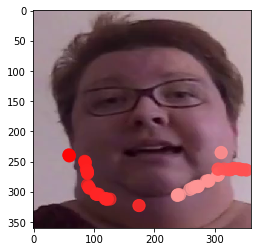

vid.shape (299, 360, 360, 3)
annot max and mins
419
215
359
158
Looking at vid 0-8
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kjgtiagnsq.mp4/face_0.mp4


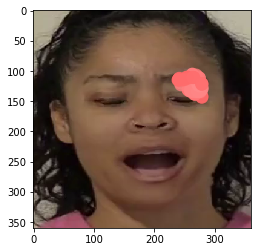

vid.shape (299, 360, 360, 3)
annot max and mins
458
438
72
158
Looking at vid 0-9
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dqmptbhnvo.mp4/face_0.mp4


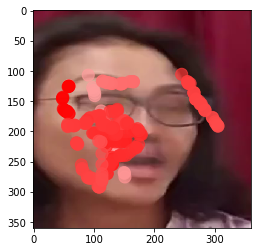

vid.shape (299, 360, 360, 3)
annot max and mins
481
416
201
193
Looking at vid 0-0
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kmtqqzwtox.mp4/face_0.mp4


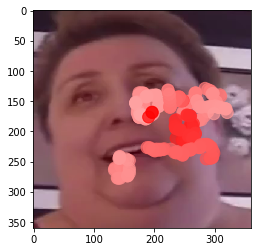

vid.shape (299, 360, 360, 3)
annot max and mins
540
511
153
243
Looking at vid 0-1
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dneghxhqsr.mp4/face_0.mp4


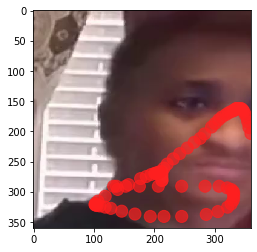

vid.shape (299, 360, 360, 3)
annot max and mins
446
485
8
109
Looking at vid 0-2
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kkfgefeqfr.mp4/face_0.mp4


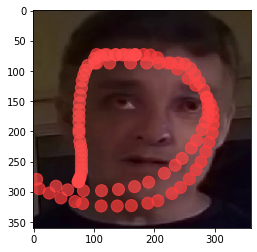

vid.shape (299, 360, 360, 3)
annot max and mins
503
480
68
72
Looking at vid 0-3
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/doiwcojvgj.mp4/face_0.mp4


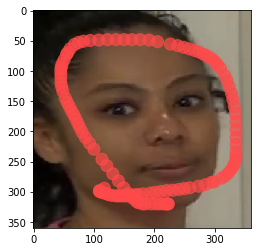

vid.shape (299, 360, 360, 3)
annot max and mins
540
458
160
99
Looking at vid 0-4
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dowybibeqv.mp4/face_0.mp4


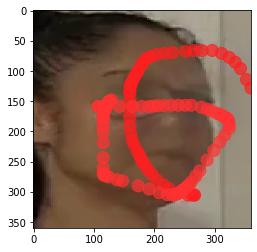

vid.shape (299, 360, 360, 3)
annot max and mins
479
478
182
142
Looking at vid 0-5
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/djdawhgbsk.mp4/face_0.mp4


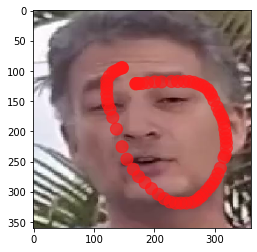

vid.shape (299, 360, 360, 3)
annot max and mins
535
496
161
294
Looking at vid 0-6
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dpihwwnser.mp4/face_0.mp4


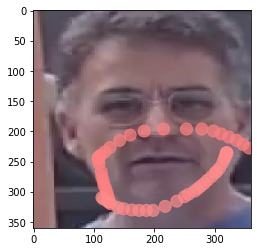

vid.shape (299, 360, 360, 3)
annot max and mins
518
485
160
407
Looking at vid 0-7
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dplgqdumdb.mp4/face_0.mp4


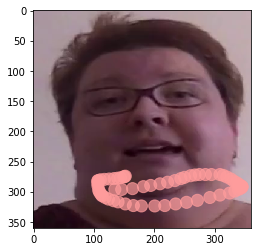

vid.shape (299, 360, 360, 3)
annot max and mins
482
287
134
151
Looking at vid 0-8
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kjgtiagnsq.mp4/face_0.mp4


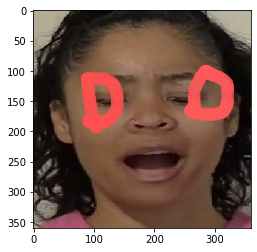

vid.shape (299, 360, 360, 3)
annot max and mins
494
446
148
169
Looking at vid 0-9
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dqmptbhnvo.mp4/face_0.mp4


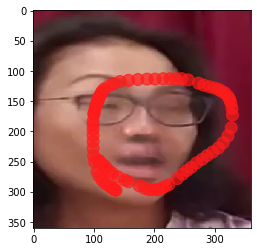

vid.shape (299, 360, 360, 3)
annot max and mins
516
312
189
188
Looking at vid 0-0
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kmtqqzwtox.mp4/face_0.mp4


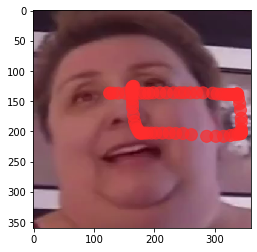

vid.shape (299, 360, 360, 3)
annot max and mins
333
348
247
133
Looking at vid 0-1
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dneghxhqsr.mp4/face_0.mp4


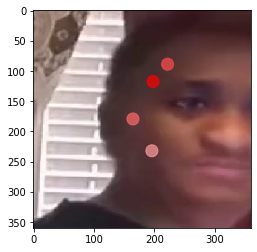

vid.shape (299, 360, 360, 3)
annot max and mins
540
454
56
146
Looking at vid 0-2
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kkfgefeqfr.mp4/face_0.mp4


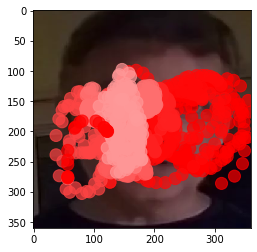

vid.shape (299, 360, 360, 3)
annot max and mins
469
436
160
164
Looking at vid 0-3
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/doiwcojvgj.mp4/face_0.mp4


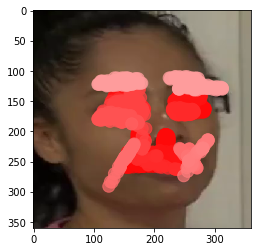

vid.shape (299, 360, 360, 3)
annot max and mins
465
453
72
141
Looking at vid 0-4
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dowybibeqv.mp4/face_0.mp4


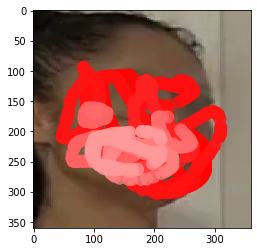

vid.shape (299, 360, 360, 3)
annot max and mins
539
501
138
122
Looking at vid 0-5
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/djdawhgbsk.mp4/face_0.mp4


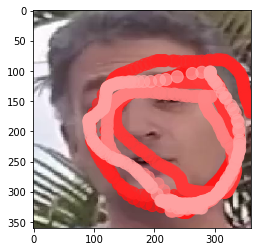

vid.shape (299, 360, 360, 3)
annot max and mins
381
411
167
273
Looking at vid 0-6
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dpihwwnser.mp4/face_0.mp4


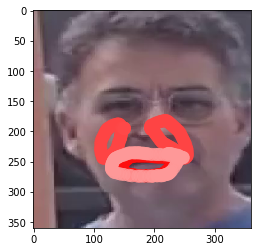

vid.shape (299, 360, 360, 3)
annot max and mins
360
372
199
309
Looking at vid 0-7
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dplgqdumdb.mp4/face_0.mp4


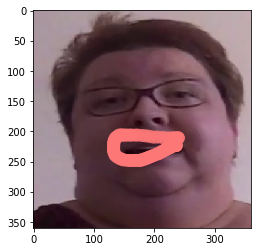

vid.shape (299, 360, 360, 3)
annot max and mins
439
189
315
116
Looking at vid 0-8
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kjgtiagnsq.mp4/face_0.mp4


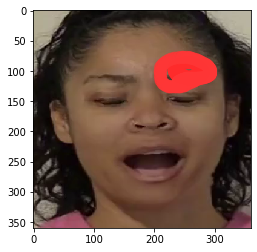

vid.shape (299, 360, 360, 3)
annot max and mins
487
517
75
114
Looking at vid 0-9
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dqmptbhnvo.mp4/face_0.mp4


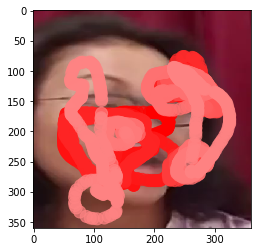

vid.shape (299, 360, 360, 3)
annot max and mins
535
469
226
190
Looking at vid 0-0
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kmtqqzwtox.mp4/face_0.mp4


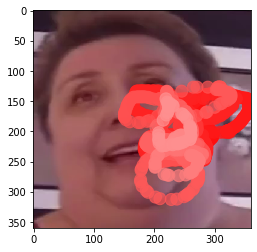

vid.shape (299, 360, 360, 3)
annot max and mins
496
413
359
119
Looking at vid 0-1
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dneghxhqsr.mp4/face_0.mp4


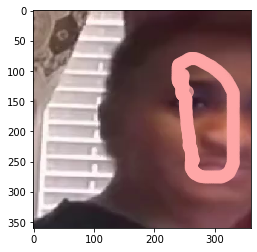

vid.shape (299, 360, 360, 3)
annot max and mins
538
409
54
82
Looking at vid 0-2
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kkfgefeqfr.mp4/face_0.mp4


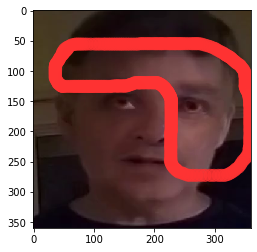

vid.shape (299, 360, 360, 3)
annot max and mins
359
265
131
163
Looking at vid 0-3
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/doiwcojvgj.mp4/face_0.mp4


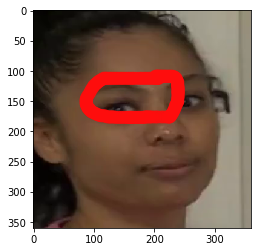

vid.shape (299, 360, 360, 3)
annot max and mins
473
478
283
147
Looking at vid 0-4
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dowybibeqv.mp4/face_0.mp4


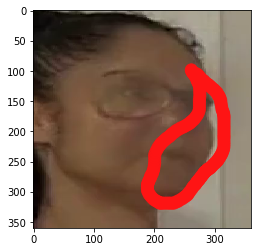

vid.shape (299, 360, 360, 3)
annot max and mins
510
456
160
153
Looking at vid 0-5
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/djdawhgbsk.mp4/face_0.mp4


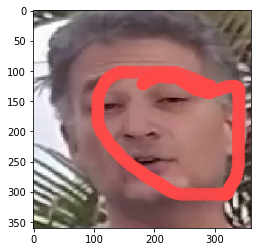

vid.shape (299, 360, 360, 3)
annot max and mins
177
463
86
280
Looking at vid 0-6
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dpihwwnser.mp4/face_0.mp4


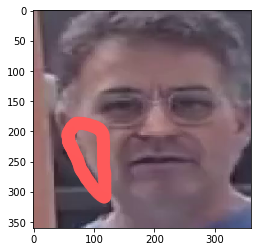

vid.shape (299, 360, 360, 3)
annot max and mins
214
443
18
39
Looking at vid 0-7
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dplgqdumdb.mp4/face_0.mp4


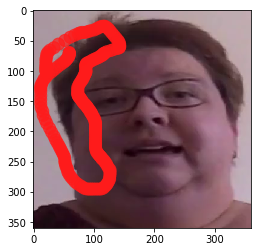

vid.shape (299, 360, 360, 3)
annot max and mins
492
526
97
410
Looking at vid 0-8
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kjgtiagnsq.mp4/face_0.mp4


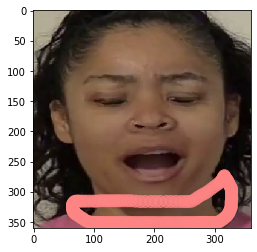

vid.shape (299, 360, 360, 3)
annot max and mins
490
463
72
125
Looking at vid 0-9
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dqmptbhnvo.mp4/face_0.mp4


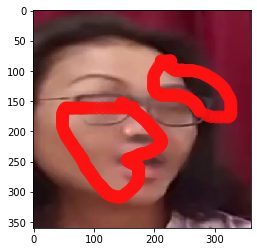

vid.shape (299, 360, 360, 3)
annot max and mins
404
356
273
210
Looking at vid 0-0
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kmtqqzwtox.mp4/face_0.mp4


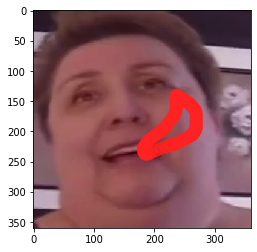

vid.shape (299, 360, 360, 3)
annot max and mins
133
446
53
398
Looking at vid 0-1
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dneghxhqsr.mp4/face_0.mp4


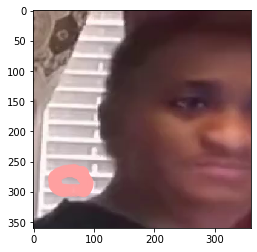

vid.shape (299, 360, 360, 3)
annot max and mins
477
474
151
99
Looking at vid 0-2
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kkfgefeqfr.mp4/face_0.mp4


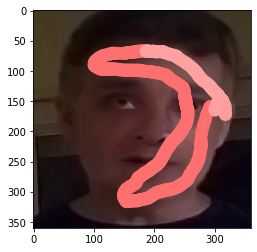

vid.shape (299, 360, 360, 3)
annot max and mins
467
273
143
171
Looking at vid 0-3
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/doiwcojvgj.mp4/face_0.mp4


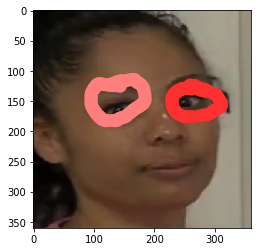

vid.shape (299, 360, 360, 3)
annot max and mins
371
446
119
159
Looking at vid 0-4
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dowybibeqv.mp4/face_0.mp4


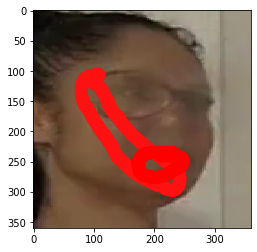

vid.shape (299, 360, 360, 3)
annot max and mins
232
268
174
175
Looking at vid 0-5
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/djdawhgbsk.mp4/face_0.mp4


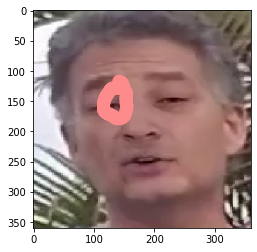

vid.shape (299, 360, 360, 3)
annot max and mins
420
480
217
400
Looking at vid 0-6
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dpihwwnser.mp4/face_0.mp4


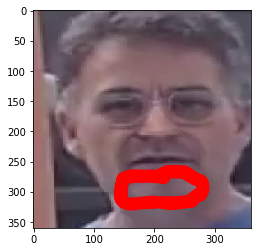

vid.shape (299, 360, 360, 3)
annot max and mins
322
198
133
84
Looking at vid 0-7
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dplgqdumdb.mp4/face_0.mp4


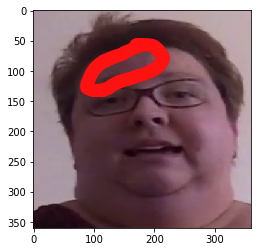

vid.shape (299, 360, 360, 3)
annot max and mins
449
273
87
159
Looking at vid 0-8
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kjgtiagnsq.mp4/face_0.mp4


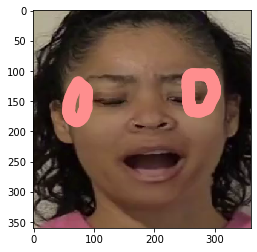

vid.shape (299, 360, 360, 3)
annot max and mins
495
509
92
132
Looking at vid 0-9
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dqmptbhnvo.mp4/face_0.mp4


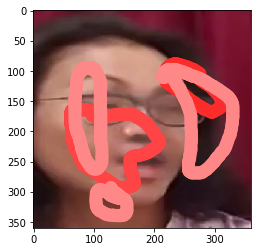

vid.shape (299, 360, 360, 3)
annot max and mins
469
358
244
206
Looking at vid 0-0
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kmtqqzwtox.mp4/face_0.mp4


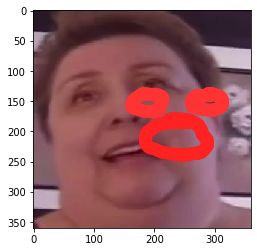

vid.shape (299, 360, 360, 3)
annot max and mins
141
474
139
474
Looking at vid 0-1
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dneghxhqsr.mp4/face_0.mp4


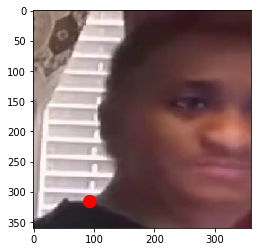

vid.shape (299, 360, 360, 3)
annot max and mins
89
495
88
493
Looking at vid 0-2
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kkfgefeqfr.mp4/face_0.mp4


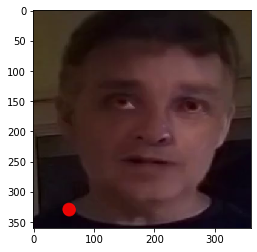

vid.shape (299, 360, 360, 3)
annot max and mins
52
441
52
438
Looking at vid 0-3
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/doiwcojvgj.mp4/face_0.mp4


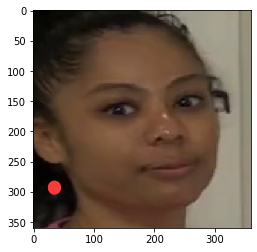

vid.shape (299, 360, 360, 3)
annot max and mins
155
474
155
474
Looking at vid 0-4
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dowybibeqv.mp4/face_0.mp4


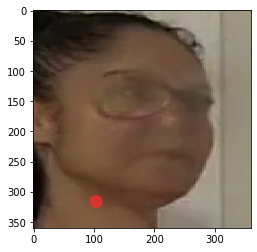

vid.shape (299, 360, 360, 3)
annot max and mins
129
458
128
458
Looking at vid 0-5
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/djdawhgbsk.mp4/face_0.mp4


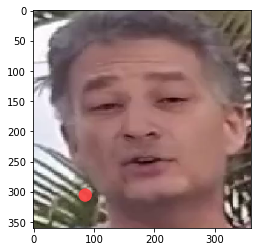

vid.shape (299, 360, 360, 3)
annot max and mins
240
429
240
428
Looking at vid 0-6
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dpihwwnser.mp4/face_0.mp4


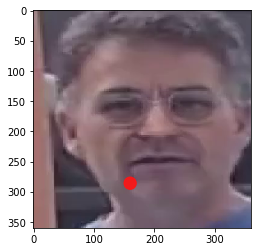

vid.shape (299, 360, 360, 3)
annot max and mins
153
432
153
430
Looking at vid 0-7
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dplgqdumdb.mp4/face_0.mp4


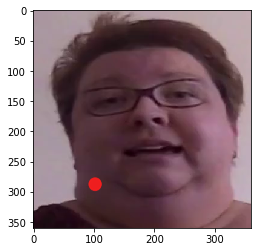

vid.shape (299, 360, 360, 3)
annot max and mins
167
456
167
456
Looking at vid 0-8
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kjgtiagnsq.mp4/face_0.mp4


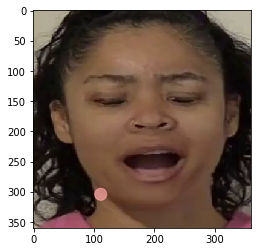

vid.shape (299, 360, 360, 3)
annot max and mins
47
448
36
410
Looking at vid 0-9
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dqmptbhnvo.mp4/face_0.mp4


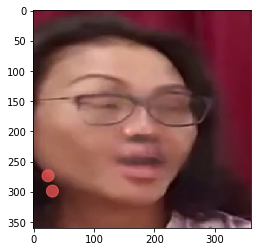

vid.shape (299, 360, 360, 3)
annot max and mins
114
468
114
468
Looking at vid 0-0
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kmtqqzwtox.mp4/face_0.mp4


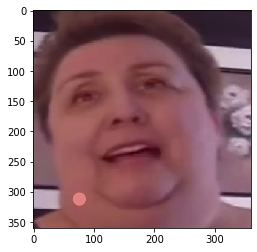

vid.shape (299, 360, 360, 3)
annot max and mins
414
524
197
327
Looking at vid 0-1
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dneghxhqsr.mp4/face_0.mp4


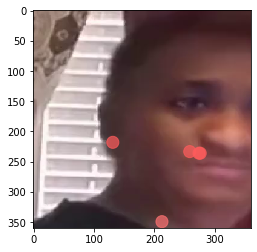

vid.shape (299, 360, 360, 3)
annot max and mins
298
370
298
370
Looking at vid 0-2
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kkfgefeqfr.mp4/face_0.mp4


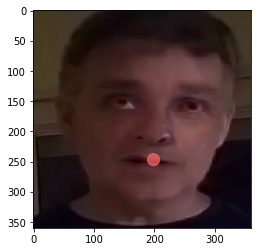

vid.shape (299, 360, 360, 3)
annot max and mins
303
295
271
293
Looking at vid 0-3
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/doiwcojvgj.mp4/face_0.mp4


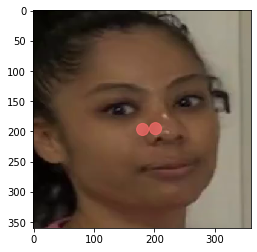

vid.shape (299, 360, 360, 3)
annot max and mins
310
322
239
309
Looking at vid 0-4
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dowybibeqv.mp4/face_0.mp4


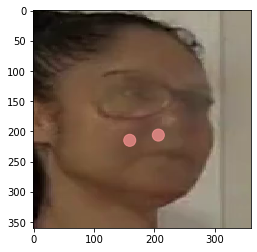

vid.shape (299, 360, 360, 3)
annot max and mins
271
369
84
328
Looking at vid 0-5
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/djdawhgbsk.mp4/face_0.mp4


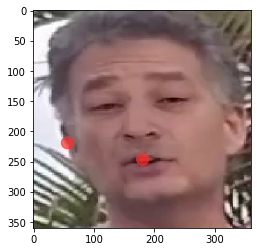

vid.shape (299, 360, 360, 3)
annot max and mins
259
335
259
335
Looking at vid 0-6
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dpihwwnser.mp4/face_0.mp4


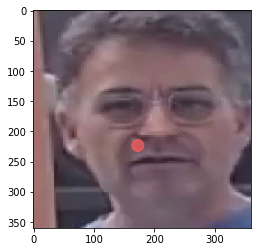

vid.shape (299, 360, 360, 3)
annot max and mins
291
357
286
356
Looking at vid 0-7
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dplgqdumdb.mp4/face_0.mp4


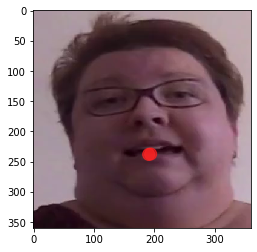

vid.shape (299, 360, 360, 3)
annot max and mins
358
350
342
346
Looking at vid 0-8
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kjgtiagnsq.mp4/face_0.mp4


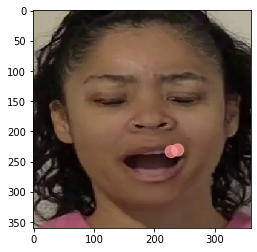

vid.shape (299, 360, 360, 3)
annot max and mins
260
395
165
324
Looking at vid 0-9
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dqmptbhnvo.mp4/face_0.mp4


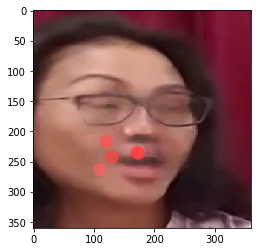

vid.shape (299, 360, 360, 3)
annot max and mins
400
369
353
364
Looking at vid 0-0
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kmtqqzwtox.mp4/face_0.mp4


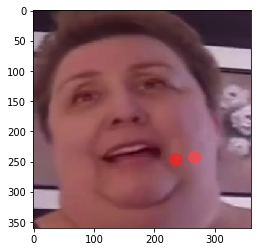

vid.shape (299, 360, 360, 3)
annot max and mins
452
494
121
143
Looking at vid 0-1
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dneghxhqsr.mp4/face_0.mp4


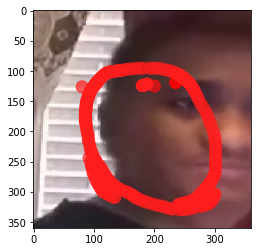

vid.shape (299, 360, 360, 3)
annot max and mins
379
434
94
156
Looking at vid 0-2
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kkfgefeqfr.mp4/face_0.mp4


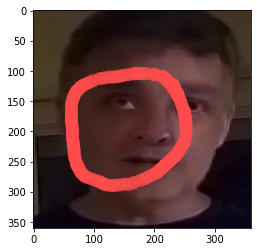

vid.shape (299, 360, 360, 3)
annot max and mins
477
496
140
150
Looking at vid 0-3
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/doiwcojvgj.mp4/face_0.mp4


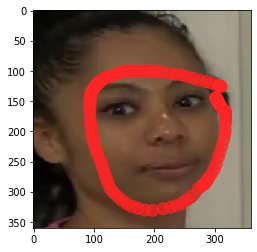

vid.shape (299, 360, 360, 3)
annot max and mins
431
434
166
159
Looking at vid 0-4
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dowybibeqv.mp4/face_0.mp4


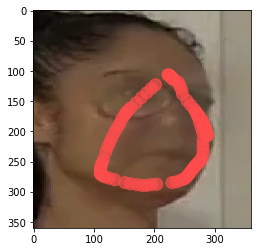

vid.shape (299, 360, 360, 3)
annot max and mins
459
479
143
156
Looking at vid 0-5
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/djdawhgbsk.mp4/face_0.mp4


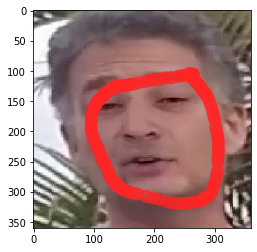

vid.shape (299, 360, 360, 3)
annot max and mins
186
489
41
100
Looking at vid 0-6
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dpihwwnser.mp4/face_0.mp4


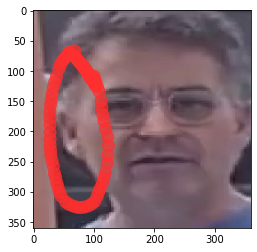

vid.shape (299, 360, 360, 3)
annot max and mins
411
439
100
150
Looking at vid 0-7
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dplgqdumdb.mp4/face_0.mp4


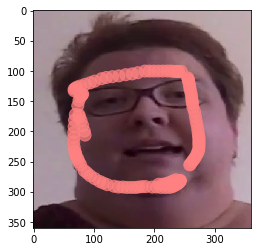

vid.shape (299, 360, 360, 3)
annot max and mins
442
301
114
138
Looking at vid 0-8
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kjgtiagnsq.mp4/face_0.mp4


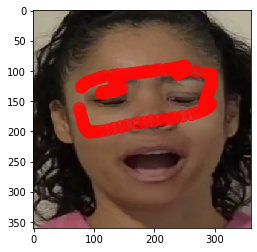

vid.shape (299, 360, 360, 3)
annot max and mins
489
437
98
138
Looking at vid 0-9
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dqmptbhnvo.mp4/face_0.mp4


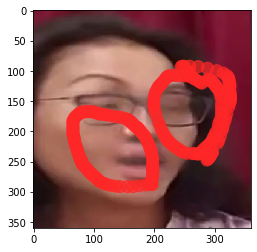

vid.shape (299, 360, 360, 3)
annot max and mins
484
444
166
179
Looking at vid 0-0
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kmtqqzwtox.mp4/face_0.mp4


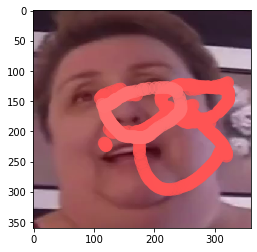

vid.shape (299, 360, 360, 3)
annot max and mins
227
387
144
378
Looking at vid 0-1
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dneghxhqsr.mp4/face_0.mp4


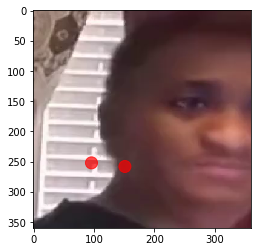

vid.shape (299, 360, 360, 3)
annot max and mins
263
378
263
378
Looking at vid 0-2
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kkfgefeqfr.mp4/face_0.mp4


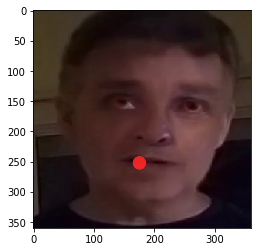

vid.shape (299, 360, 360, 3)
annot max and mins
244
392
244
392
Looking at vid 0-3
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/doiwcojvgj.mp4/face_0.mp4


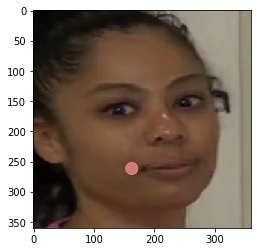

vid.shape (299, 360, 360, 3)
annot max and mins
174
460
174
460
Looking at vid 0-4
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dowybibeqv.mp4/face_0.mp4


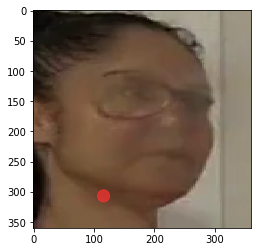

vid.shape (299, 360, 360, 3)
annot max and mins
216
388
216
388
Looking at vid 0-5
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/djdawhgbsk.mp4/face_0.mp4


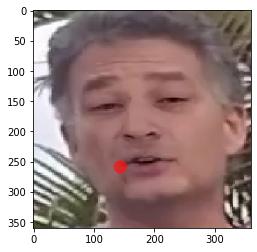

vid.shape (299, 360, 360, 3)
annot max and mins
272
352
272
352
Looking at vid 0-6
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dpihwwnser.mp4/face_0.mp4


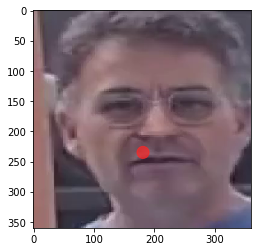

vid.shape (299, 360, 360, 3)
annot max and mins
267
407
267
407
Looking at vid 0-7
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dplgqdumdb.mp4/face_0.mp4


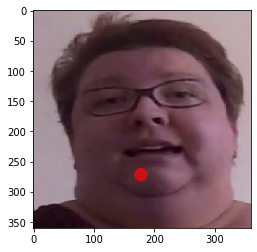

vid.shape (299, 360, 360, 3)
annot max and mins
387
382
387
382
Looking at vid 0-8
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kjgtiagnsq.mp4/face_0.mp4


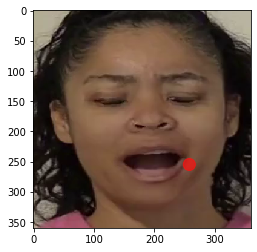

vid.shape (299, 360, 360, 3)
annot max and mins
284
378
284
361
Looking at vid 0-9
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dqmptbhnvo.mp4/face_0.mp4


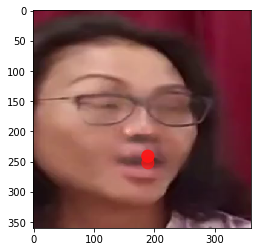

vid.shape (299, 360, 360, 3)
annot max and mins
332
384
332
384
Looking at vid 0-0
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kmtqqzwtox.mp4/face_0.mp4


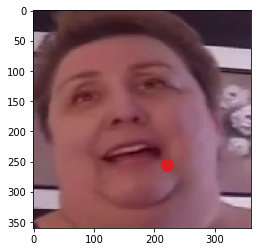

vid.shape (299, 360, 360, 3)
annot max and mins
428
250
93
138
Looking at vid 0-1
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dneghxhqsr.mp4/face_0.mp4


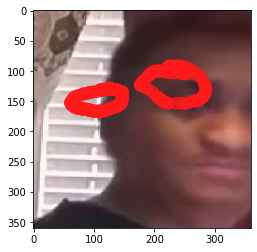

vid.shape (299, 360, 360, 3)
annot max and mins
392
424
66
110
Looking at vid 0-2
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kkfgefeqfr.mp4/face_0.mp4


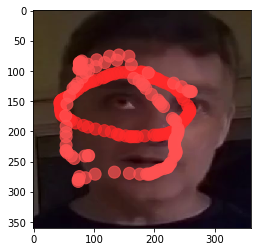

vid.shape (299, 360, 360, 3)
annot max and mins
371
361
204
72
Looking at vid 0-3
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/doiwcojvgj.mp4/face_0.mp4


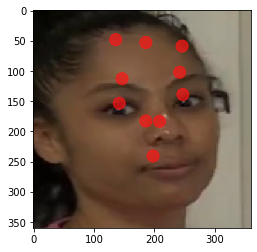

vid.shape (299, 360, 360, 3)
annot max and mins
405
436
102
249
Looking at vid 0-4
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dowybibeqv.mp4/face_0.mp4


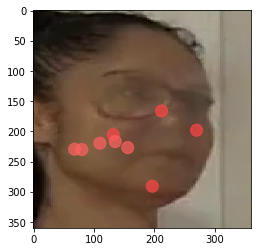

vid.shape (299, 360, 360, 3)
annot max and mins
473
395
263
240
Looking at vid 0-5
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/djdawhgbsk.mp4/face_0.mp4


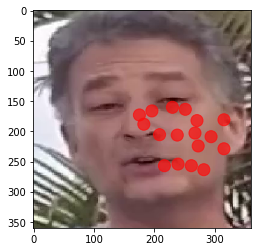

vid.shape (299, 360, 360, 3)
annot max and mins
401
449
114
185
Looking at vid 0-6
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dpihwwnser.mp4/face_0.mp4


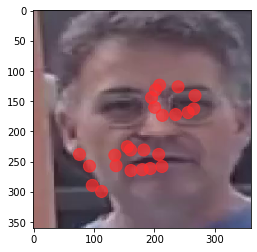

vid.shape (299, 360, 360, 3)
annot max and mins
313
348
249
337
Looking at vid 0-7
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dplgqdumdb.mp4/face_0.mp4


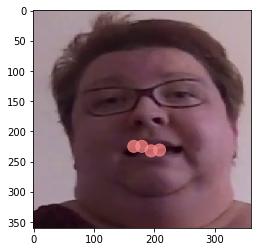

vid.shape (299, 360, 360, 3)
annot max and mins
405
237
126
181
Looking at vid 0-8
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kjgtiagnsq.mp4/face_0.mp4


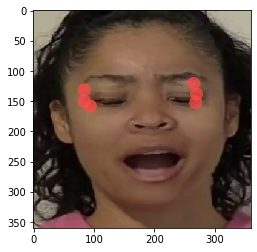

vid.shape (299, 360, 360, 3)
annot max and mins
485
468
52
177
Looking at vid 0-9
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dqmptbhnvo.mp4/face_0.mp4


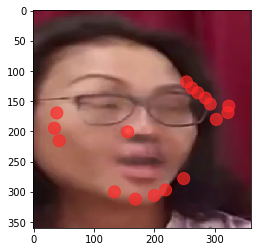

vid.shape (299, 360, 360, 3)
annot max and mins
475
351
244
204
Looking at vid 0-0
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kmtqqzwtox.mp4/face_0.mp4


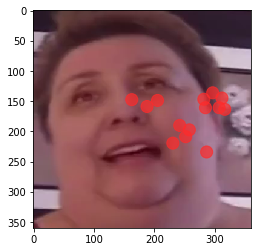

vid.shape (299, 360, 360, 3)
annot max and mins
512
446
88
134
Looking at vid 0-1
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/dneghxhqsr.mp4/face_0.mp4


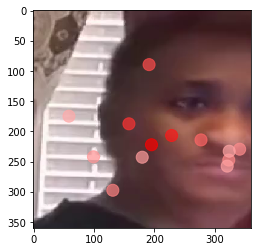

vid.shape (299, 360, 360, 3)
annot max and mins
483
398
121
66
Looking at vid 0-2
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/kkfgefeqfr.mp4/face_0.mp4


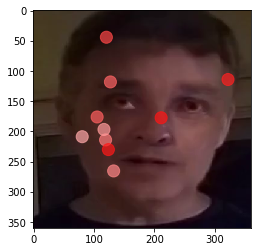

vid.shape (299, 360, 360, 3)
annot max and mins
429
405
93
205
Looking at vid 0-3
URL: http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_7/doiwcojvgj.mp4/face_0.mp4


KeyboardInterrupt: 

In [54]:
def visualize_mturk_responses(resp_list, overlay_on_first_frame=True):
    '''Overlay the mturk responses to their correponding videos. 
    Can overlay on either the first frame of the video or the frame where the annots belong'''
    
    for resp in resp_list:
        d = json.loads(resp["results"])
        for vid_n, vid_d in d["outputs"].items():
            print("Looking at vid", vid_n)
            vid_url = list(vid_d.keys())[0]
            print("URL:", vid_url)
            annot_list = vid_d[vid_url]
            
            vid = load_video(vid_url)
            show_overlay(vid, annot_list, overlay_on_first_frame)        
            


def load_video(url, plot=True, data_path = '/home/camilo/Datasets/'):
    '''Loads video from scratch if scratch is mounted. Else, downloads the video.'''
    
    vid_name = url.split('DeepfakeDetection/')[-1]
    if os.path.isdir(data_path):
#         print(os.path.join(data_path, vid_name))
        cap = cv2.VideoCapture(os.path.join(data_path, vid_name))
        flag = True
        frames = []
        
        while flag:
            flag, fr = cap.read()
            
            if flag: frames.append(np.expand_dims(fr[:,:,::-1],0))
#             print(frames[-1].shape)
            
    if plot:
        plt.imshow(frames[0][0])
        plt.show()
    return np.concatenate(frames, axis=0)
    
    
def show_overlay(vid, annot_list, overlay_on_first_frame=True):
    
    
    fig,ax = plt.subplots(1)
    ax.set_aspect('equal')
    ax.imshow(vid[0])
    print("vid.shape",vid.shape)
    print("annot max and mins")
    print(max([x[0] for x in annot_list]))
    print(max([x[1] for x in annot_list]))
    print(min([x[0] for x in annot_list]))
    print(min([x[1] for x in annot_list]))
    
    resc_factor_x = vid.shape[2]/540
    resc_factor_y = vid.shape[1]/540
    
    for x,y,f in annot_list:
    
            circ = Circle((x*resc_factor_x,y*resc_factor_y),10,color=(1,f/15,f/15,0.7))
            ax.add_patch(circ)
    
visualize_mturk_responses(resp_list, overlay_on_first_frame=True)

In [ ]:
# Create average heatvolumes

def create_heatvolume():
    